# HOMEWORK 15

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [71]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [86]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

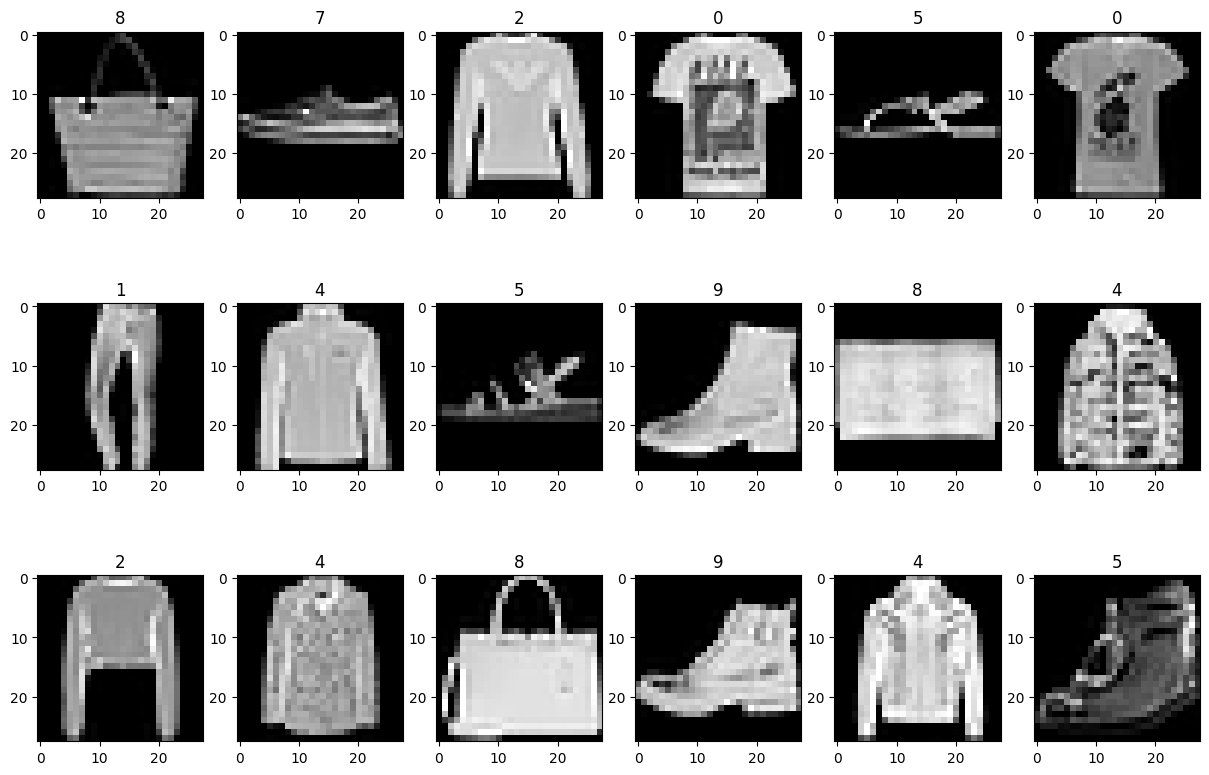

In [73]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [87]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [108]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,213,002 (12.26 MB)

 Trainable params: 3,213,002 (12.26 MB)

 Non-trainable params: 0 (0.00 B)

In [109]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.7974 - loss: 0.6559 - val_accuracy: 0.8732 - val_loss: 0.3575
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8919 - loss: 0.3058 - val_accuracy: 0.8826 - val_loss: 0.3295
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9110 - loss: 0.2532 - val_accuracy: 0.8845 - val_loss: 0.3288
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9224 - loss: 0.2171 - val_accuracy: 0.8847 - val_loss: 0.3391
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9329 - loss: 0.1868 - val_accuracy: 0.8856 - val_loss: 0.3538
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9413 - loss: 0.1626 - val_accuracy: 0.8816 - val_loss: 0.3921
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9491 - loss: 0.1439 - val_accuracy: 0.8784 - val_loss: 0.4155
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9549 - loss: 0.1267 - 

In [75]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])


Train Acc      0.9929333329200745
Validation Acc 0.8676999807357788


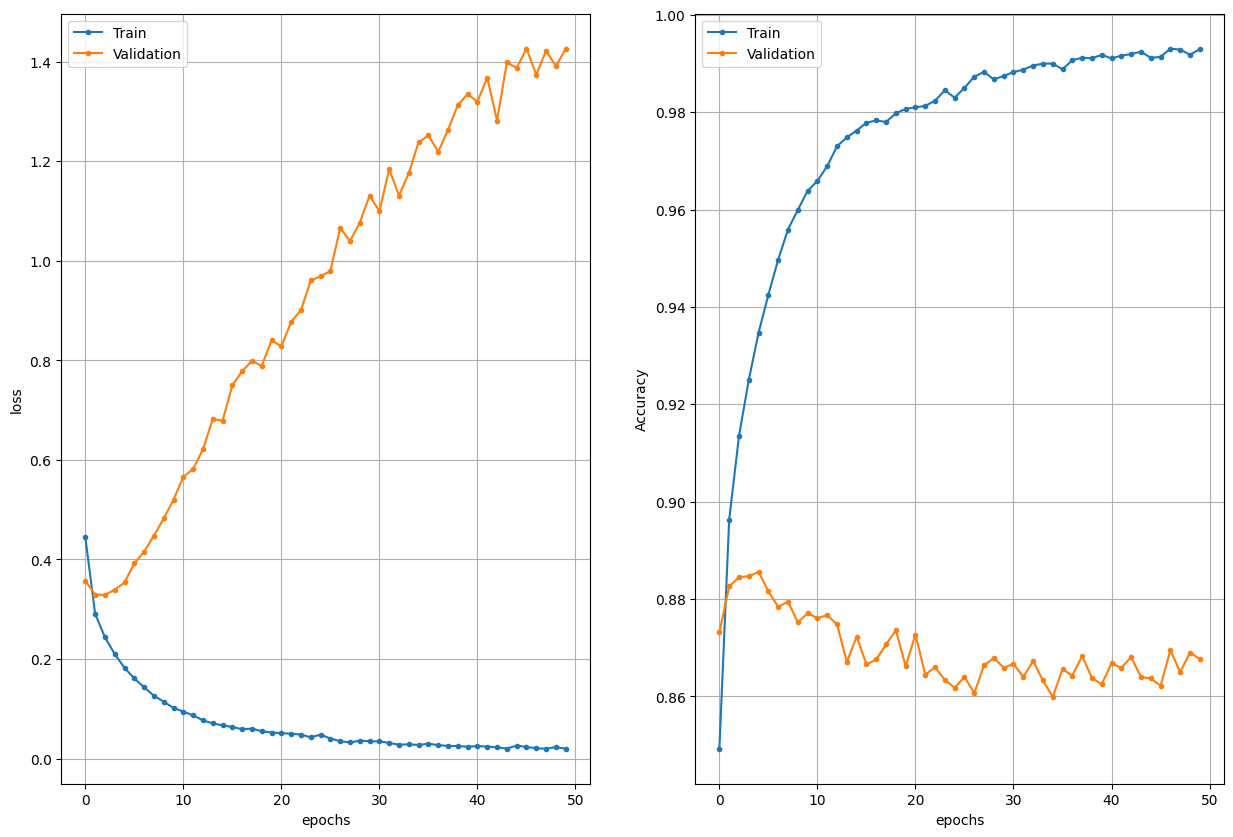

In [110]:
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [95]:
# One-hot encoding
y_train2 = y_train
y_test2 = y_test
x_train2 = x_train
x_test2 = x_test

print('Train set:   ', len(y_train2), 'samples')
print('Test set:    ', len(y_test2), 'samples')
print('Sample dims: ', x_train2.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


In [96]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs2 = Input(shape=(size, size, 1))
net2 = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs2)
net2 = BatchNormalization()(net2)
net2 = MaxPooling2D(pool_size=(2, 2))(net2)
net2 = Dropout(0.2)(net2)
net2 = Flatten()(net2)
net2 = Dense(128, activation="relu")(net2)
net2 = Dropout(0.5)(net2)
outputs2 = Dense(num_classes, activation="softmax", kernel_regularizer='l2')(net2)

model2 = Model(inputs2, outputs2)
model2.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,682 (3.07 MB)

 Trainable params: 804,618 (3.07 MB)

 Non-trainable params: 64 (256.00 B)

In [99]:
# Train the network
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.utils import shuffle

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x[idx:idx + batch_size, ...]
            y_ = y[idx:idx + batch_size]

            if len(y_) < batch_size:
                x, y = shuffle(x, y)
                break

            # Augmentation
            for idx_aug in range(batch_size):
                if np.random.rand() > 0.5:
                    x_[idx_aug, ...] = np.fliplr(x_[idx_aug, ...])

            yield x_, y_

epochs2 = 50
batch_size2 = 64

steps_per_epoch2 = len(y_train2) // batch_size2
generator2 = datagen(x_train2, y_train2, batch_size2)

early_stopping2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint2 = ModelCheckpoint('best_model1.keras', monitor='val_loss', save_best_only=True)
reduce_lr2 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

# Compile the model
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

start2 = time()
history2 = model2.fit(generator2, steps_per_epoch=steps_per_epoch2, epochs=epochs2, validation_data=(x_test2, y_test2),
                    callbacks=[early_stopping2, model_checkpoint2, reduce_lr2])
print('Elapsed time', time() - start2)

Epoch 1/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8615 - loss: 0.4271 - val_accuracy: 0.8851 - val_loss: 0.3418 - learning_rate: 0.0010
Epoch 2/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8812 - loss: 0.3541 - val_accuracy: 0.8879 - val_loss: 0.3237 - learning_rate: 0.0010
Epoch 3/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8939 - loss: 0.3190 - val_accuracy: 0.8953 - val_loss: 0.3103 - learning_rate: 0.0010
Epoch 4/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8960 - loss: 0.3066 - val_accuracy: 0.9037 - val_loss: 0.2895 - learning_rate: 0.0010
Epoch 5/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8973 - loss: 0.2980 - val_accuracy: 0.9063 - val_loss: 0.2799 - learning_rate: 0.0010
Epoch 6/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8993 - loss: 0.2886 - val_accuracy: 0.9068 - val_loss: 0.2760 - learning_rate: 0.0010
Epoch 7/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9075 - l

Train Acc      0.9560598731040955
Validation Acc 0.9247000217437744


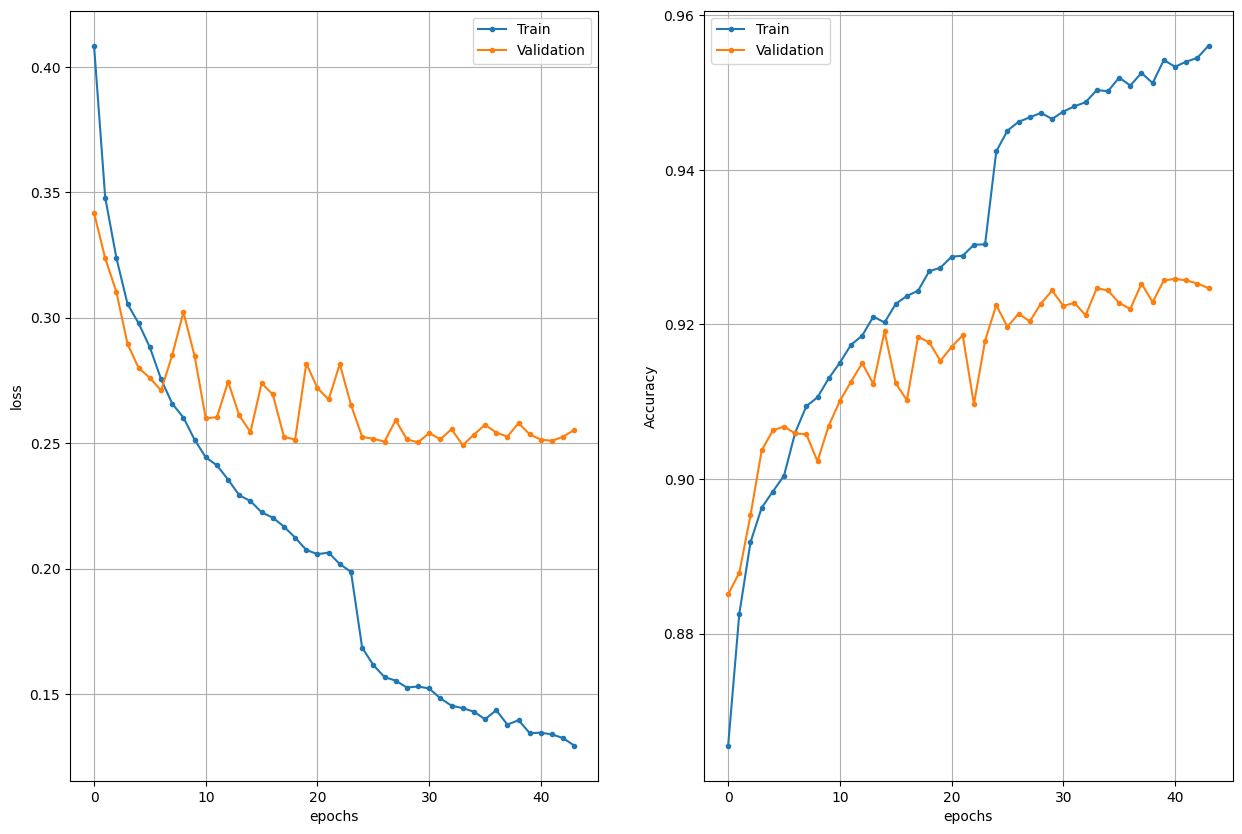

In [100]:
plot_history(history2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9253 - loss: 0.2542
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


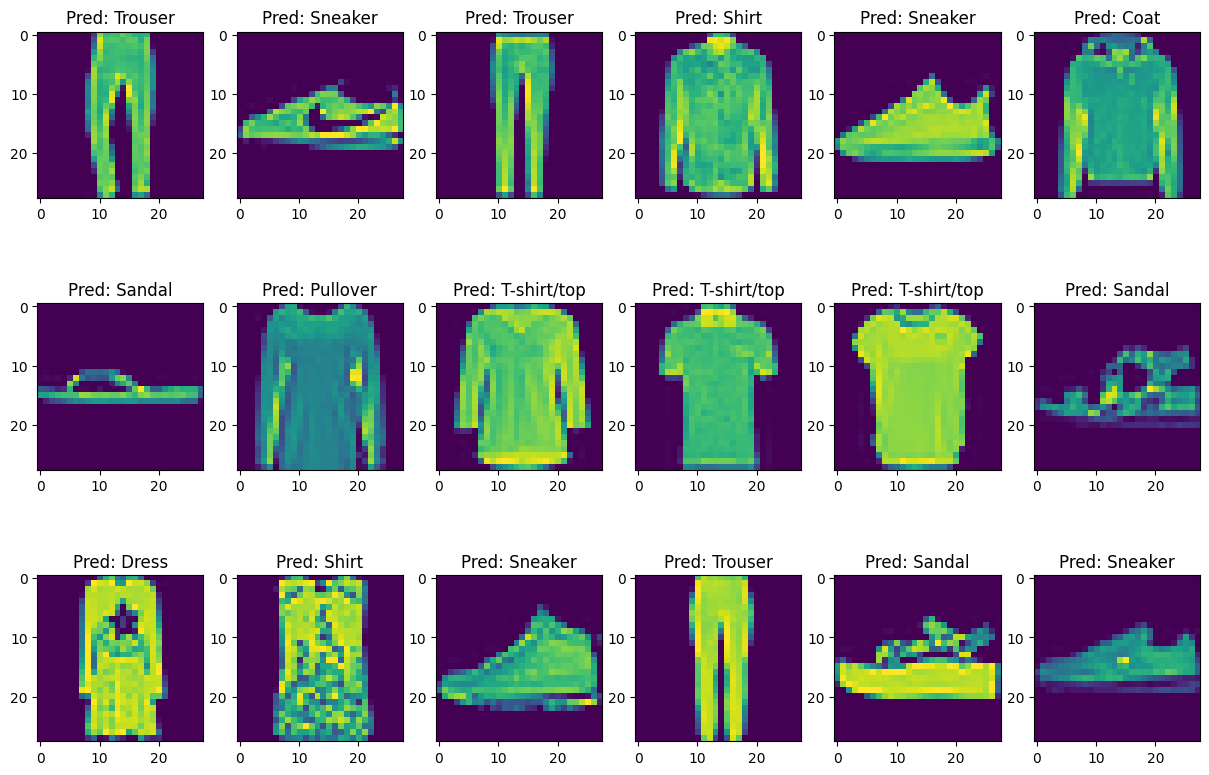

In [107]:
# Show the results

ev2 = model2.evaluate(x_test, y_test)

y_pred2 = model.predict(x_test2)
y_pred2 = np.argmax(y_pred2, axis=1)
classes = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

for ii in range(18):
    # Pick a random sample
    idx = np.random.randint(x_test2.shape[0])
    # Show the results
    plt.subplot(3,6,ii+1), plt.imshow(x_test2[idx, ...])
    plt.title('Pred: ' + str(classes[y_pred2[idx]]))

### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?

### Answers
* To improve the performanse we use Dropout
* No